In [154]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
from sklearn.metrics import precision_score
from sklearn import neighbors, metrics
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image  
from sklearn.externals.six import StringIO
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster




from sklearn.neural_network import MLPClassifier

import time
from sklearn.metrics import make_scorer 
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, AgglomerativeClustering




warnings.filterwarnings("ignore")

In [1206]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep=',')
print(data.shape)
data.head(5)

(23162, 9)


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [1207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [1208]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


# Busco valores duplicados

In [1209]:
data[data.duplicated()]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


# Buscamos valores nulos

In [1210]:
data.isnull().values.any()

False

# Revisamos qu elos datos esten completos

In [1211]:
data.count()

ESTADO                23162
INGRESOS              23162
CASA                  23162
PRECIO_DISPOSITIVO    23162
MESES                 23162
DURACION              23162
SOBRECARGO            23162
SALDO_RESTANTE        23162
SATISFACCION          23162
dtype: int64

# Buscamos valores atipicos en INGRESOS

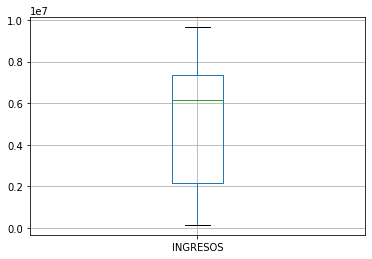

In [1212]:
data.boxplot(column=['INGRESOS'])

# Buscamos valores atipicos en CASA

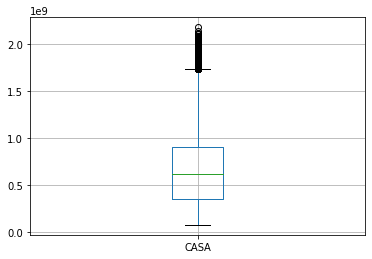

In [1213]:
data.boxplot(column=['CASA'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable CASA

# Buscamos valores atipicos en PRECIO_DISPOSITIVO	

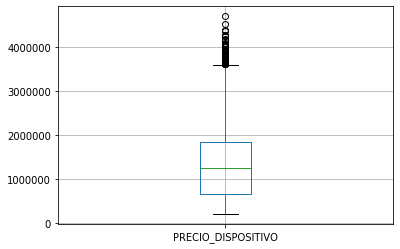

In [1214]:
data.boxplot(column=['PRECIO_DISPOSITIVO'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable PRECIO_DISPOSITIVO

# Buscamos valores atipicos en MESES	

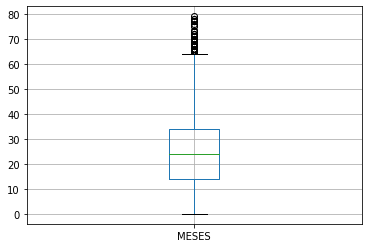

In [1215]:
data.boxplot(column=['MESES'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable MESES

# Buscamos valores atipicos en DURACION

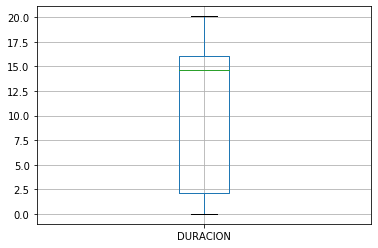

In [1216]:
data.boxplot(column=['DURACION'])

# Buscamos valores atipicos en SOBRECARGO

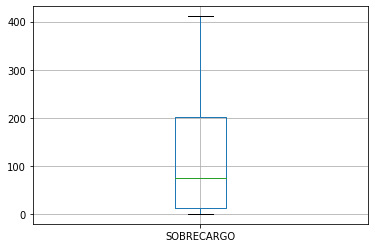

In [1217]:
data.boxplot(column=['SOBRECARGO'])

# Buscamos valores atipicos en SALDO_RESTANTE

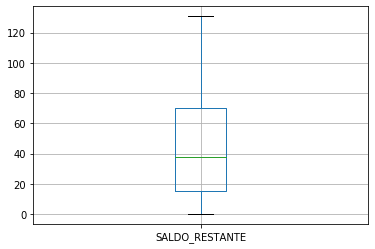

In [1218]:
data.boxplot(column=['SALDO_RESTANTE'])

# Buscamos valores atipicos en SATISFACCION

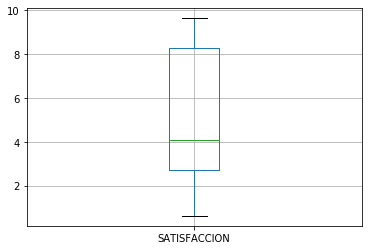

In [1219]:
data.boxplot(column=['SATISFACCION'])

________________

________________

________________

# Solucion de inconsistencias en los datos


In [1220]:
deletedData=data.copy()

In [1221]:
print("Antes: "+str(data.shape))
def drop_numerical_outliers(data, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq))) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data.drop(data.index[~constrains], inplace=True)
drop_numerical_outliers(data)
data
print("Despues: "+str(data.shape))

Antes: (23162, 9)
Despues: (20953, 9)


In [1222]:
print("Antes: "+str(deletedData.shape))
def drop_numerical_outliers1(deletedData, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = deletedData.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq))) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    deletedData.drop(deletedData.index[constrains], inplace=True)
drop_numerical_outliers1(deletedData)
deletedData
print("Despues: "+str(deletedData.shape))

Antes: (23162, 9)
Despues: (2209, 9)


## Aqui estan los datos atipicos encontrados y separados de dataFrame original

In [1223]:
deletedData

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
6,RETIRADO,7256758,7.120000e+08,3493707.0,20,14.8,217.322554,69.5,8.285137
29,RETIRADO,1409067,1.105000e+09,644429.0,55,16.6,188.592668,5.8,9.027948
31,VINCULADO,7320612,1.548000e+09,284060.0,38,18.2,31.606283,92.6,2.779810
44,RETIRADO,8763522,7.940000e+08,902864.0,15,15.0,21.277878,56.6,3.330574
45,RETIRADO,4036032,5.080000e+08,2750512.0,27,2.5,224.352073,25.6,9.117037
82,VINCULADO,7319634,1.599000e+09,1259835.0,12,2.0,0.000000,72.7,1.208224
88,RETIRADO,7659140,8.540000e+08,2944507.0,37,18.4,287.722936,80.8,8.163270
100,RETIRADO,8691926,1.978000e+09,1100248.0,10,15.1,259.381896,51.1,8.289950


# 3 Tipos de modelos

# Protocolo de evalucaion HoldOut


## Vamos a utilizar el protocolo de evaluacion holdout con un 70% train y 30% test para los 3 modelos a evaluar.

Para este proyecto vamos a utilizar las metricas  de <b>Kappa global</b>, <b>Accuracy</b> y la <b>Precision</b> que nos permitiran determinar el mejor modelo a seguir. En este caso el <b>Kappa global</b> determinar el mejor modelo que se encuentre por encima del baseline. El <b>Accuracy</b> nos permitira ver la cantidad de predicciones positivas que fueron correctas. Por ultimo la <b>Precision</b> nos dara una vista del porcentaje de casos positivos detectados.

In [1224]:
def transformar(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [1225]:
def transformar2(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [1226]:
data['ESTADO'] = data.applymap(transformar)['ESTADO']

In [1227]:
data.head(5)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


# BaseLine

In [1228]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


50.13601870853815

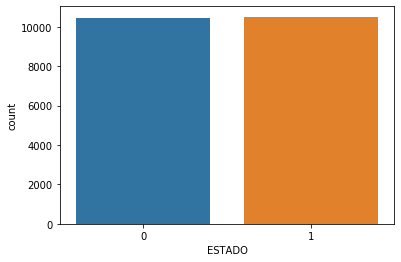

In [1229]:
### Baseline
ax = sns.countplot(x="ESTADO", data=data)
data.ESTADO[data.ESTADO==1].aggregate('count') / data.shape[0] * 100

## La probabilidad de que el siguiente cliente sea vinculado, accuracy del baseLine 50.136018%

# Holdout del datset

In [1230]:
data['ESTADO'] = data.applymap(transformar2)['ESTADO']

In [1231]:
data.corr(method="pearson")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
ESTADO,1.000000,-0.002640,-0.000811,0.004680,0.005914,0.003026,-0.733850,-0.003172,-0.799079
INGRESOS,-0.002640,1.000000,0.376284,-0.002491,-0.007802,-0.162776,0.000992,0.849837,0.004364
CASA,-0.000811,0.376284,1.000000,0.001979,-0.000172,-0.063783,0.003193,0.324477,0.003523
PRECIO_DISPOSITIVO,0.004680,-0.002491,0.001979,1.000000,-0.004031,0.012935,0.000949,-0.000027,-0.002261
MESES,0.005914,-0.007802,-0.000172,-0.004031,1.000000,0.007726,0.002495,-0.007470,-0.000090
DURACION,0.003026,-0.162776,-0.063783,0.012935,0.007726,1.000000,-0.001173,0.047924,-0.001634
SOBRECARGO,-0.733850,0.000992,0.003193,0.000949,0.002495,-0.001173,1.000000,0.002620,0.897264
SALDO_RESTANTE,-0.003172,0.849837,0.324477,-0.000027,-0.007470,0.047924,0.002620,1.000000,0.004455
SATISFACCION,-0.799079,0.004364,0.003523,-0.002261,-0.000090,-0.001634,0.897264,0.004455,1.000000


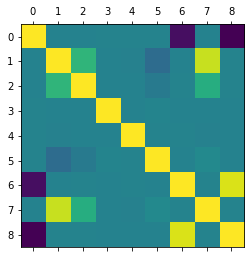

In [1232]:
plt.matshow(data.corr())

Encontramos que la variable ESTADO esta fuertemente correlacionada con las variables SOBRECARGO y SATISFACCION.
Con respecto a PCA en el caso de que no fuera un aprendizaje no supervisado lo mas probable es que si hallamos los componentes principales encontraremos que las variables de SOBRECARGO y SATISFACCION. Ademas de que es probable es que esas dos variables sean las mas representativas para representar el ESTADO de un cliente.

In [1233]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


In [1234]:
x=data[["SOBRECARGO","SATISFACCION"]].values
y=data[["ESTADO"]].values

In [1235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [1236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)




X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelo KNN

In [1237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Holdout

In [1238]:
from sklearn.model_selection import StratifiedShuffleSplit
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)


ss= StratifiedShuffleSplit(n_splits=1, test_size=0.3, train_size=0.7, random_state=12345)


In [1239]:
k_vec= np.arange(1,40,3)
k_vec

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [1240]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=30)


In [1241]:
import time

start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'n_neighbors': k_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(knn, param_grid=parametros, cv=ss, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)


In [1242]:
grid.fit(X_normalized, y)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))



Los parámetros del mejor modelo fueron {'n_neighbors': 37}, que permiten obtener un Accuracy de 78.95% y un Kappa del 57.92
Tiempo total: 0.12 minutos


In [1243]:

df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))



In [1244]:
df.iloc[np.argsort(-df.Accuracy),]


,Accuracy,Kappa
12,78.953229,57.918804
10,78.841871,57.695960
11,78.762329,57.538585
8,78.635062,57.282189
9,78.571429,57.157065
7,78.412345,56.839396
5,78.221444,56.457091
6,78.141903,56.295711
4,78.125994,56.263465
3,77.839644,55.694868


In [1245]:

df = pd.DataFrame([(kcount,acc*100, kappa*100) for (kcount,acc, kappa) in 
                   zip( 
                       grid.cv_results_['param_n_neighbors'], 

                       
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                       
                      )
                   ], columns = ('K','Accuracy', 'Kappa'))



In [1246]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

,K,Accuracy,Kappa
12,37,78.953229,57.918804
10,31,78.841871,57.695960
11,34,78.762329,57.538585
8,25,78.635062,57.282189
9,28,78.571429,57.157065
7,22,78.412345,56.839396
5,16,78.221444,56.457091
6,19,78.141903,56.295711
4,13,78.125994,56.263465
3,10,77.839644,55.694868


In [1247]:
y_pred = grid.best_estimator_.predict(X_test)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matris de confusion
[[2661  496]
 [ 763 2366]]
Accuracy: 0.7997136493795737 , Kappa: 0.5992677108698503 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3157
           1       0.83      0.76      0.79      3129

    accuracy                           0.80      6286
   macro avg       0.80      0.80      0.80      6286
weighted avg       0.80      0.80      0.80      6286



# Modelo Arbol de decision

In [142]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=8,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=2,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

Evaluacion del modelo

## Mejor arbol de decision

In [143]:
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=8,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=2,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)
criterion_vec = ['entropy', 'gini']
max_depth_vec = [2,4,8,16,32,64,128]
min_samples_split_vec = [4,6,8,12,16,20,24]
min_samples_leaf_vec = [2,4,6,8,10,12]
random_state_vec = [None]
max_leaf_nodes_vec = [2,4,6,8,10,12]
min_impurity_decrease_vec = [0.0001,0.001,0.01,0.4]
class_weight_vec=[None]


In [144]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'criterion': criterion_vec,
              'max_depth':max_depth_vec,
              'min_samples_split': min_samples_split_vec,
              'min_samples_leaf': min_samples_leaf_vec,
              'random_state': random_state_vec,
              'max_leaf_nodes': max_leaf_nodes_vec,
              'min_impurity_decrease': min_impurity_decrease_vec,
              'class_weight': class_weight_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(ctree, param_grid=parametros, cv=ss, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)


In [145]:
grid.fit(X_normalized, y)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))


Los parámetros del mejor modelo fueron {'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2, 'min_samples_split': 4, 'random_state': None}, que permiten obtener un Accuracy de 78.95% y un Kappa del 57.92
Tiempo total: 3.15 minutos


In [146]:

df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))


In [147]:
df.iloc[np.argsort(-df.Accuracy),]

,Accuracy,Kappa
9428,78.953229,57.923709
9608,78.953229,57.923709
9609,78.953229,57.923709
9610,78.953229,57.923709
9611,78.953229,57.923709
9612,78.953229,57.923709
9613,78.953229,57.923709
9614,78.953229,57.923709
9615,78.953229,57.923709
9616,78.953229,57.923709


In [148]:

df = pd.DataFrame([(cri,md,mss,msl,rs,mln,mid,cw,acc*100, kappa*100) for (cri,md,mss,msl,rs,mln,mid,cw,acc, kappa) in 
                   zip( 
                       grid.cv_results_['param_criterion'], 
                       grid.cv_results_['param_max_depth'], 
                       grid.cv_results_['param_min_samples_split'], 
                       grid.cv_results_['param_min_samples_leaf'], 
                       grid.cv_results_['param_random_state'], 
                       grid.cv_results_['param_max_leaf_nodes'],
                       grid.cv_results_['param_min_impurity_decrease'],
                       grid.cv_results_['param_class_weight'],
                       
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                       
                      )
                   ], columns = ('Criterion','Max Depth','Min Samples split','Min Sample leaf','random state','max leaf nodes','min imp decrease','class weight','Accuracy', 'Kappa'))


In [149]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

,Criterion,Max Depth,Min Samples split,Min Sample leaf,random state,max leaf nodes,min imp decrease,class weight,Accuracy,Kappa
9428,gini,8,24,6,None,6,0.0001,None,78.953229,57.923709
9608,gini,8,16,10,None,8,0.0001,None,78.953229,57.923709
9609,gini,8,20,10,None,8,0.0001,None,78.953229,57.923709
9610,gini,8,24,10,None,8,0.0001,None,78.953229,57.923709
9611,gini,8,4,12,None,8,0.0001,None,78.953229,57.923709
9612,gini,8,6,12,None,8,0.0001,None,78.953229,57.923709
9613,gini,8,8,12,None,8,0.0001,None,78.953229,57.923709
9614,gini,8,12,12,None,8,0.0001,None,78.953229,57.923709
9615,gini,8,16,12,None,8,0.0001,None,78.953229,57.923709
9616,gini,8,20,12,None,8,0.0001,None,78.953229,57.923709


In [150]:
y_pred = grid.best_estimator_.predict(X_test)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matris de confusion
[[2699  458]
 [ 814 2315]]
Accuracy: 0.7976455615653834 , Kappa: 0.5950787930522302 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3157
           1       0.83      0.74      0.78      3129

    accuracy                           0.80      6286
   macro avg       0.80      0.80      0.80      6286
weighted avg       0.80      0.80      0.80      6286



# Red Neuronal

In [ ]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [ ]:
print(X_train.shape); print(X_test.shape)

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Mejor red neuronal

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=ss, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

# <font color="red"><b>No ejecutar este codigo, se demora mucho</b></font>

In [ ]:
grid.fit(X_normalized, y)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),]

In [ ]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

## La salida del codigo anterior fue :

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.006, 'max_iter': 500}, que permiten obtener un Accuracy de 79.19% y un Kappa del 58.40
Tiempo total: 27.43 minutos

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),learning_rate_init=0.006, activation='logistic', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)


In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

# Conclusion

<font color="red">Mejor KNN:</font><br>
0.7997136493795737 , Kappa: 0.5992677108698503 <br>
<font color="red">Mejor Arbol de descicion:</font><br>
Accuracy: 0.7976455615653834 , Kappa: 0.5950787930522302<br> 
<font color="red">Mejor red neuronal:</font><br>
Accuracy: 0.7963728921412663 , Kappa: 0.5925540731477168 

El modelo que demostro un mejor desempeno fue knn

# PARTE 2

## Filtramos del data frame que se le eliminaron los datos atipicos y procedemos a separar los clientes que retirados para empezar a construir los clusters.

In [156]:
data[data['ESTADO'] == 0]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206
7,0,3262245,6.840000e+08,985708.0,32,1.3,275.595131,19.0,8.040629
9,0,874177,7.250000e+08,1403586.0,19,17.8,0.000000,19.9,2.138861
10,0,4061667,9.340000e+08,438256.0,9,1.8,0.000000,4.9,2.164890
11,0,3529836,7.240000e+08,647659.0,18,4.3,303.162095,29.6,7.984475
12,0,3829846,8.770000e+08,1150132.0,40,5.4,150.868408,33.2,7.855744
13,0,7639749,3.170000e+08,825889.0,27,0.7,178.247186,89.5,7.826984
15,0,661848,1.450000e+08,1241824.0,0,14.7,311.590203,23.7,8.221092
16,0,1494939,5.740000e+08,665683.0,26,16.0,132.838471,18.0,8.646060


In [157]:
del data['ESTADO']

In [158]:
del data['SATISFACCION']

In [159]:
del data['PRECIO_DISPOSITIVO']

In [160]:
del data['MESES']

ESTADO: El estado se elimina la variable debido a que ya se conoce que todos los clientes estan retirados.

SATISFACCION: La satisfaccion no es una variable que indique algun comportamiento de consumo de servico de telefonia, marca mas la calidad que se presta como servicio de telefonia.

PRECIO_DISPOSITIVO: El precio del dispositivo no seria una variable socio-demografica debido a que las personas que tengan un dispositivo de alta gama no significa que tengan unos ingresos o un estus social alto. A diferencia de las variables CASA y INGRESOS.

MESES: La variable meses no representa ninguna informacion socio-demografica de la persona o sobre el consumo de servicio telefonico.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20953 entries, 0 to 23161
Data columns (total 5 columns):
INGRESOS          20953 non-null int64
CASA              20953 non-null float64
DURACION          20953 non-null float64
SOBRECARGO        20953 non-null float64
SALDO_RESTANTE    20953 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.6 MB


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter
from time import time


from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

## PCA

In [163]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(data)
print(scaler.mean_)

[4.72564282e+06 7.06826182e+08 9.51195056e+00 1.07744663e+02
 4.17742376e+01]


In [164]:
df_std = scaler.transform(data)

In [165]:
pca = PCA()
df_proyectado = pca.fit_transform(df_std)

#### Componentes

In [166]:
pca.components_

array([[ 0.64959915,  0.41776419, -0.09406184,  0.00343409,  0.6281995 ],
       [ 0.02414576,  0.06738996, -0.97290144,  0.04260823, -0.21569166],
       [-0.00638079,  0.00237428,  0.04244877,  0.99905794,  0.00591377],
       [-0.27022038,  0.905167  ,  0.12308126, -0.00730675, -0.304058  ],
       [ 0.71019586, -0.03998436,  0.16632574,  0.00160626, -0.68290282]])

In [167]:
data.columns

Index(['INGRESOS', 'CASA', 'DURACION', 'SOBRECARGO', 'SALDO_RESTANTE'], dtype='object')

In [168]:
pca.explained_variance_

array([2.08750753, 1.01918256, 1.00001465, 0.77000954, 0.12352436])

##### valores de los PC

In [169]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.41748158, 0.20382678, 0.19999338, 0.15399456, 0.02470369])

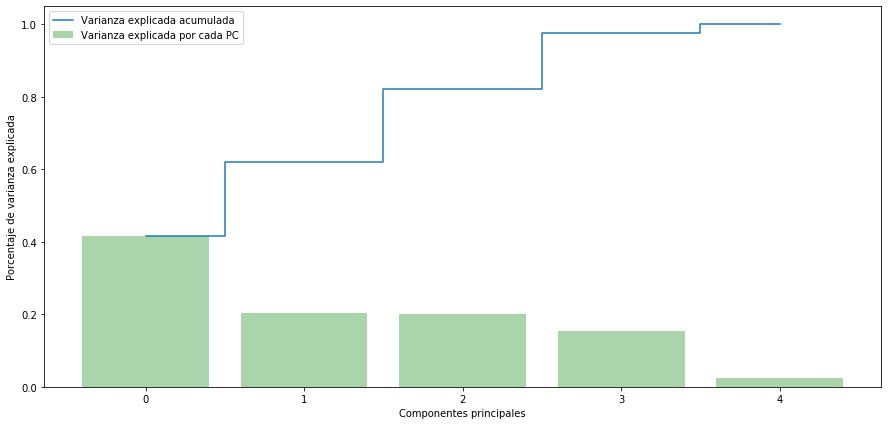

In [170]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [171]:
pca.explained_variance_ratio_

array([0.41748158, 0.20382678, 0.19999338, 0.15399456, 0.02470369])

In [172]:
np.sum(pca.explained_variance_ratio_[0:3])

0.8213017484587525

In [173]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# 10 samples with 5 features
train_features = np.random.rand(10,5)

model = PCA(n_components=5).fit(df_std)
X_pc = model.transform(df_std)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]


initial_feature_names = data.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())


In [174]:
df

,0,1
0,PC0,INGRESOS
1,PC1,DURACION
2,PC2,SOBRECARGO
3,PC3,CASA
4,PC4,INGRESOS


In [175]:
df_proyectado

array([[-0.36111548,  1.13339582, -1.0243988 ,  0.5089725 ,  0.1385199 ],
       [ 0.23130871, -1.1555291 ,  1.28700968, -1.45771904,  1.04338895],
       [ 1.47070312,  1.16838207,  0.18054705, -0.83273518,  0.09620393],
       ...,
       [ 0.69522434, -1.20646285,  1.90043816, -0.83006156,  0.5579448 ],
       [-1.83076031, -0.82240939,  0.36091416, -0.16027822, -0.18162516],
       [ 1.09679872, -1.20897148, -0.83420738, -0.81172673,  0.59896388]])

In [176]:
df_proyectado=df_proyectado[:,0:3]

In [177]:
df_proyectado

array([[-0.36111548,  1.13339582, -1.0243988 ],
       [ 0.23130871, -1.1555291 ,  1.28700968],
       [ 1.47070312,  1.16838207,  0.18054705],
       ...,
       [ 0.69522434, -1.20646285,  1.90043816],
       [-1.83076031, -0.82240939,  0.36091416],
       [ 1.09679872, -1.20897148, -0.83420738]])

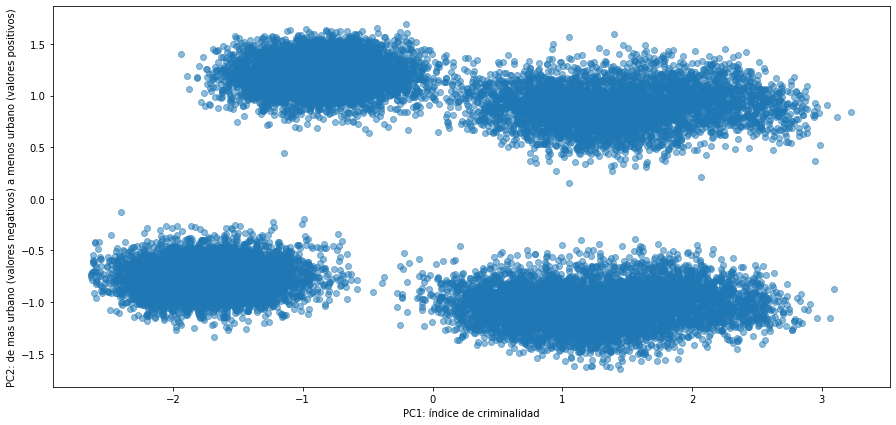

In [178]:
plt.figure(figsize=(15, 7))
plt.scatter(df_proyectado[:, 0], df_proyectado[:, 1], alpha=0.5)
plt.xlabel('PC1: índice de criminalidad')
plt.ylabel('PC2: de mas urbano (valores negativos) a menos urbano (valores positivos)')
for x,y,label in zip(df_proyectado[:, 0], df_proyectado[:, 1], df.index):
    plt.annotate(None,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [179]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid()

In [180]:
def biplot(data, loadings, index1, index2, labels=None, point_labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1]*.8, loadings[i,index2]*.8,color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]*.85, loadings[i,index2]*.85, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]*.85, loadings[i,index2]*.85, labels[i], color='g', ha='center', va='center')
    for x,y,label in zip(xs*scalex, ys*scaley, point_labels):
        plt.annotate(None,
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1+1))
    plt.ylabel("PC{}".format(index2+1))
    plt.grid() 

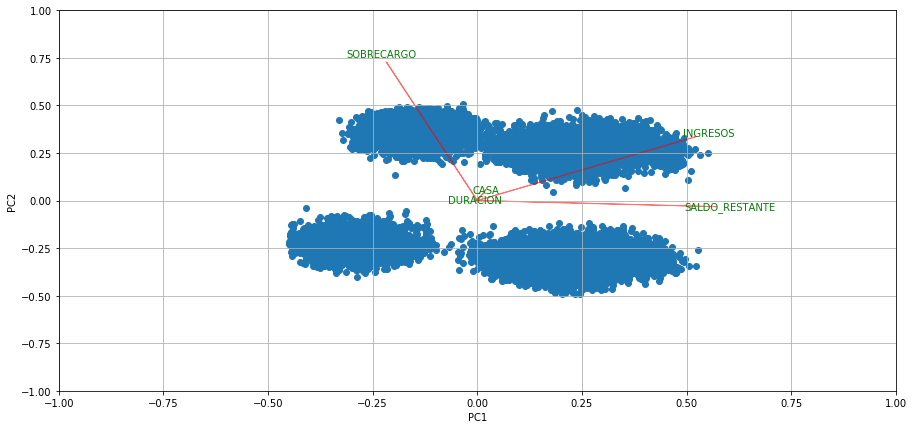

In [181]:
biplot(df_proyectado, pca.components_, 0, 1, data.columns, data.index[0:3])

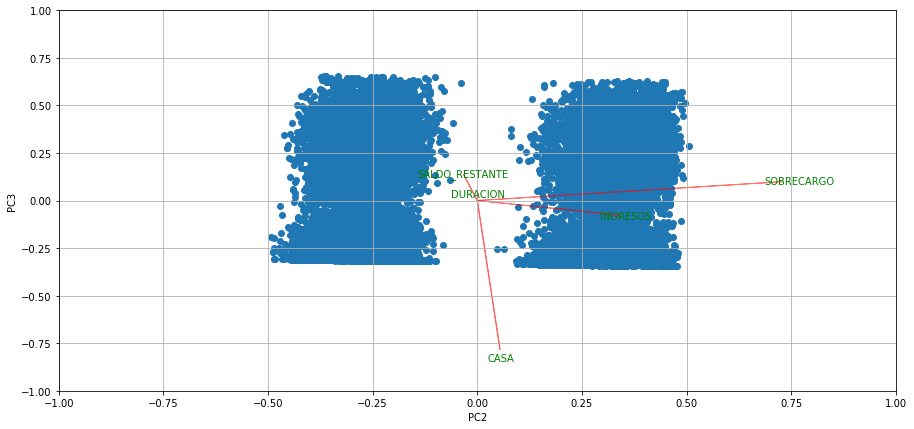

In [182]:
biplot(df_proyectado, pca.components_, 1, 2, data.columns, data.index[0:3])

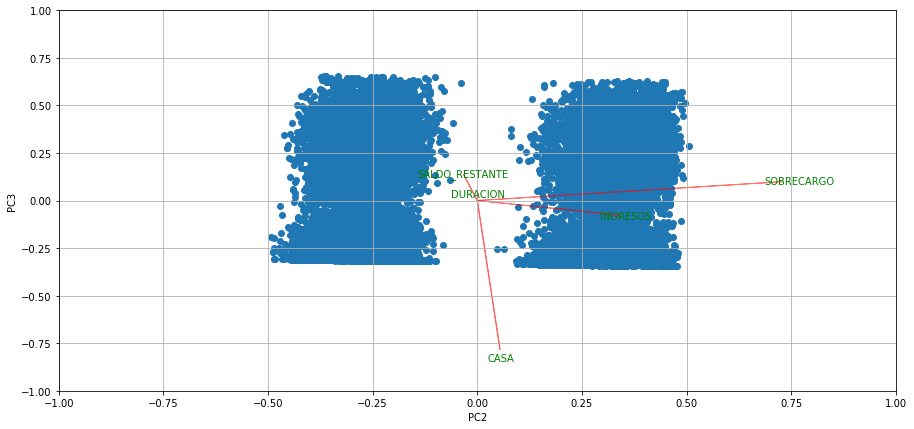

In [183]:
biplot(df_proyectado, pca.components_, 1, 2, data.columns, data.index[0:3])

# Los 3 componentes principales mas importantes

PC1: 41.7% Como podemos evidenciar los INGRESOS representa la participacion positiva mas alta con un 0.65 sin embargo hay otras variables como el SALDO que muestra un valor 0.628 positivamente y por ultimo el valor de CASA es de 0.4177 positivo para PC1. Esto nos quiere decir que PC1 esta repartido equitativamente entre esas 3 variables que lo representan.

PC2: 20.3% El segundo PC evidencia que la DURACION  tiene la mayor participacion negativa con -0.972 y es la variable mas importante de todas para este PC. Esto se puede interpretar que PC2 esta constuitido en su mayoria por la variable DURACION.

PC3: 20.0% Por ultimo el PC3 esta constituido en su mayoria por SOBRECARGO con un 0.99.Las otras variables no tienen relevacia alguna

Con estos 3 componentes principales representamos el 82.1% de los datos

## CLUSTERS K-MEANS

In [184]:
dataStd = pd.DataFrame(df_proyectado)
dataStd.columns=['PC1', 'PC2', 'PC3']

### Interpretacion con K=3

In [185]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [186]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({0: 9986, 1: 5514, 2: 5453})


In [187]:
dataStd.columns

Index(['PC1', 'PC2', 'PC3', 'Cluster'], dtype='object')

In [188]:
dataStd

,PC1,PC2,PC3,Cluster
0,-0.361115,1.133396,-1.024399,1
1,0.231309,-1.155529,1.287010,0
2,1.470703,1.168382,0.180547,0
3,1.087405,0.726880,-1.137663,0
4,-0.739174,1.359653,1.650569,1
5,2.134280,0.865147,-1.127523,0
6,-1.485460,-1.066266,-1.037308,2
7,-0.639614,1.317480,-1.143411,1
8,-0.453092,0.886931,1.949824,1
9,-0.187537,0.667296,0.413538,1


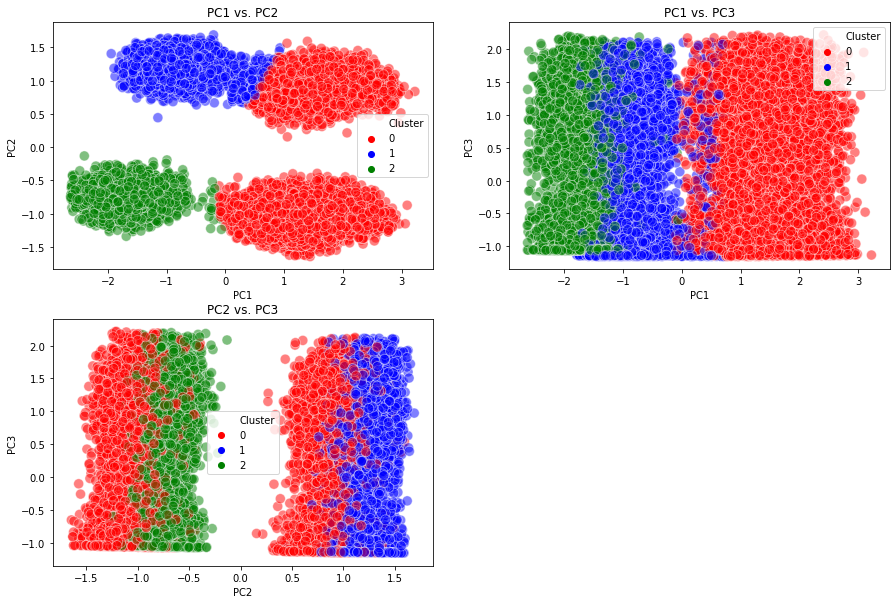

In [189]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

### Interpretacion con K=4

In [190]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [191]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 5813, 2: 5453, 0: 5440, 3: 4247})


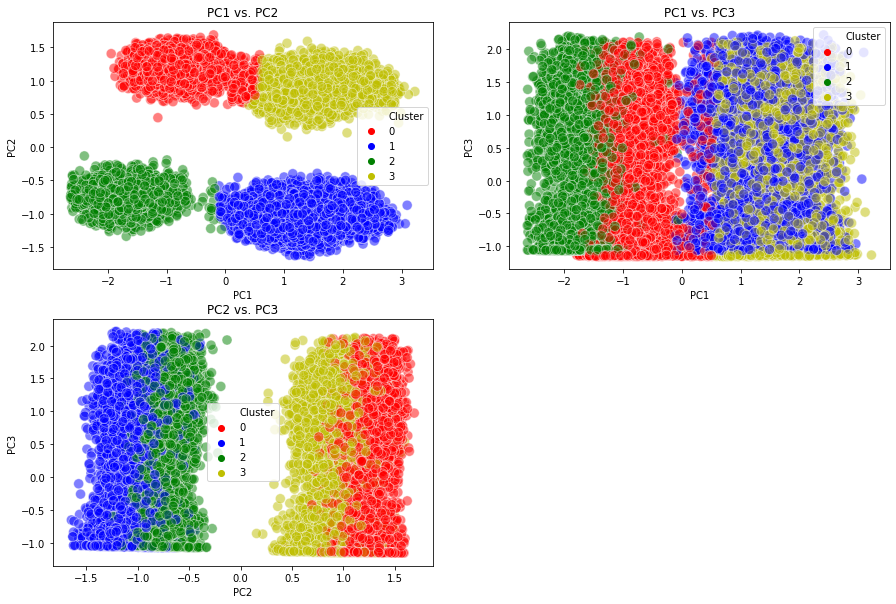

In [192]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g","y"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

### Interpretacion con K=5

In [193]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(dataStd)
clusters = kmeans.labels_

In [194]:
dataStd['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({3: 5444, 1: 5439, 0: 4247, 4: 3130, 2: 2693})


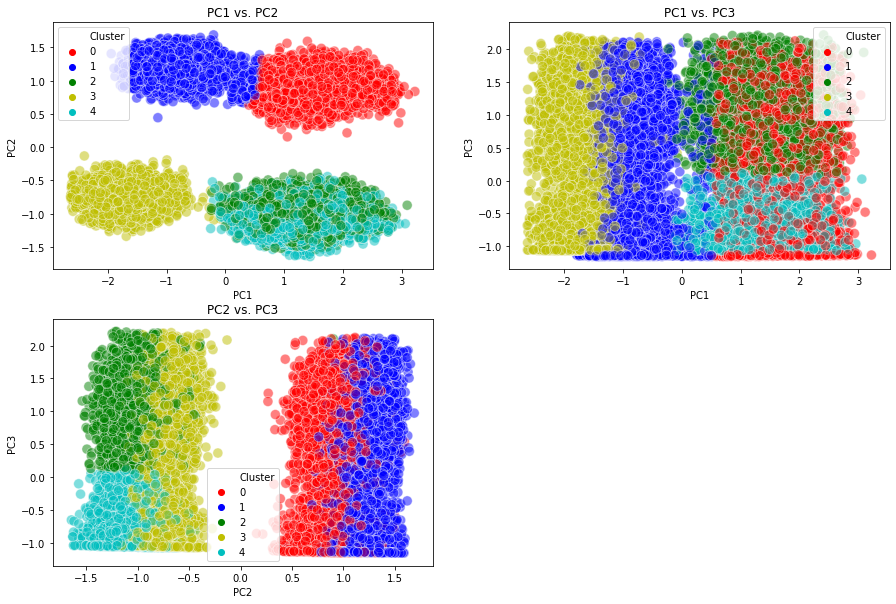

In [195]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g","y","c"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC1", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC3")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC2", y="PC3", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC2 vs. PC3")
plt.show()

# Cluster jerarquico

### Interpretacion con K=3

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from collections import Counter
from time import time


from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Interpretacion con K=4

### Interpretacion con K=5

### CODO

In [197]:
WSSs = []
for i in range(1,8) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(dataStd)
    WSSs.append(km.inertia_)
WSSs

[126197.55454455569,
 73173.08985415439,
 47648.91318819419,
 32484.796771410874,
 21770.346173341546,
 17133.38048067862,
 12437.477972654195]

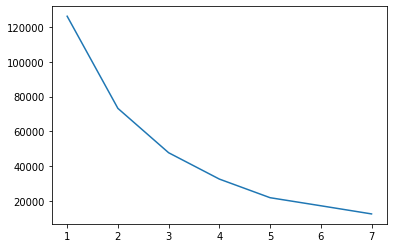

In [198]:
plt.plot(range(1, 8), WSSs)

## Conclusion

Con respecto al metodo del codo podemos determinar que lo mejor para la compañia de telefonia celular es realizar 4 campañas de fidelizacion.

#### Campaña 1

Para este cluster proponemos realizar una campaña de fidelizacion que este centrada para las personas que compartan la caracteristica de INGRESO. Puesto que estas personas son un grupo que comum mente se retira del servicio de telefonia.

#### Campaña 2

#### Campaña 3

#### Campaña 4

# Cluster jerrarquico

KeyboardInterrupt: 

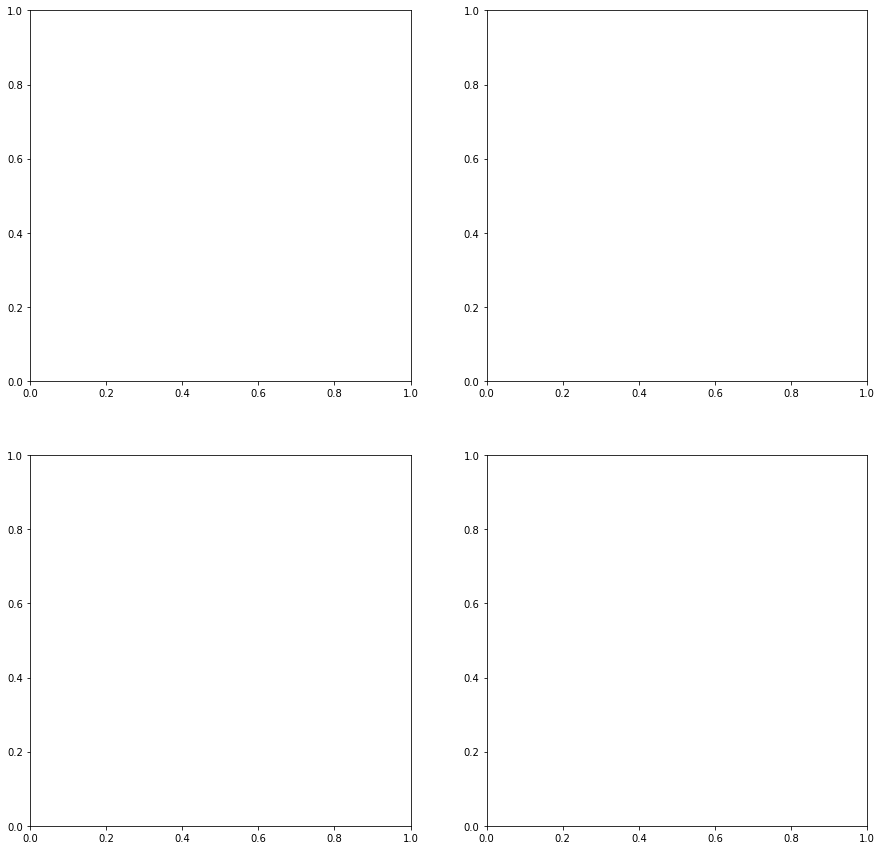

In [201]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

link = 'ward'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(df_std)
axes[0][0].scatter(df_std[:, 0], df_std[:, 1], c=clustering.labels_, s=50, cmap='viridis')
axes[0][0].set_title("%s linkage" % link)

link = 'complete'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(df_std)
axes[0][1].scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=50, cmap='viridis')
axes[0][1].set_title("%s linkage" % link)


link = 'average'
clustering = AgglomerativeClustering(linkage=link, n_clusters=4)
clustering.fit(df_std)
axes[1][0].scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=50, cmap='viridis')
axes[1][0].set_title("%s linkage" % link)


clustering = KMeans(n_clusters=4)
clustering.fit(df_std)
axes[1][1].scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=50, cmap='viridis')
axes[1][1].set_title("K-Means")
